In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                test_val_accumulator = ast.literal_eval(line)
#     print("\ntest_val_accumulator: ", test_val_accumulator)
    return test_val_accumulator

In [3]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_accumulator = ast.literal_eval(line)
    
    return sparsity_accumulator

In [4]:
def selectivity_val_extractor(file_name):
    selectivity_average_accumulator = list()
    selectivity_std_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 2:
                selectivity_average_accumulator = ast.literal_eval(line)
            if i == 3:
                selectivity_std_accumulator = ast.literal_eval(line)
       
    return selectivity_average_accumulator, selectivity_std_accumulator

In [5]:
def all_plotter(__list__, test_acc_list, sparsity_list, selectivity_average_list, selectivity_std_list, location='best'):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.plot(__list__, test_acc_list, marker='s', label='test accuracy', c='r')
    ax.plot(__list__, sparsity_list, marker='v', label='sparsity', c='g')
    ax.errorbar(__list__, selectivity_average_list, selectivity_std_list, marker='^', label='selectivity', c='b')
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    ax.grid()
    plt.show()

In [6]:
hidden_layer_neurons = [64, 128, 256, 384, 512, 768, 1024]

# Graph 

In [7]:
def plotter_50_50(optimizer_name, flag=False):
    test_vals  = test_val_extractor(f'{optimizer_name}_50_50.txt')
    sparsities = sparsity_val_extractor(f'{optimizer_name}_50_50.txt')
    selectivity_average, selectivity_std = selectivity_val_extractor(f"{optimizer_name}_50_50.txt")
    
    if flag==False:
        all_plotter(hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')
    
    if flag==True:
        return test_vals, sparsities, selectivity_average, selectivity_std

In [8]:
test_acc_sgd,      spar_sgd,      selec_avg_sgd,      selec_std_sgd      = plotter_50_50('sgd', flag=True)
test_acc_Adadelta, spar_Adadelta, selec_avg_Adadelta, selec_std_Adadelta = plotter_50_50('adadelta', flag=True)
test_acc_Adagrad,  spar_Adagrad,  selec_avg_Adagrad,  selec_std_Adagrad  = plotter_50_50('adagrad', flag=True)
test_acc_Adam    , spar_Adam    , selec_avg_Adam    , selec_std_Adam     = plotter_50_50('adam', flag=True)

In [9]:
def plotter_1_50(optimizer_name, flag=False):
    test_vals  = test_val_extractor(f'{optimizer_name}_1_50.txt')
    sparsities = sparsity_val_extractor(f'{optimizer_name}_1_50.txt')
    selectivity_average, selectivity_std = selectivity_val_extractor(f"{optimizer_name}_1_50.txt")
    
    if flag==False:
        all_plotter(hidden_layer_neurons, test_vals, sparsities, selectivity_average, selectivity_std, 'lower right')
    
    if flag==True:
        return test_vals, sparsities, selectivity_average, selectivity_std

In [10]:
test_acc_sgd1,      spar_sgd1,      selec_avg_sgd1,      selec_std_sgd1      = plotter_1_50('sgd', flag=True)
test_acc_Adadelta1, spar_Adadelta1, selec_avg_Adadelta1, selec_std_Adadelta1 = plotter_1_50('adadelta', flag=True)
test_acc_Adagrad1,  spar_Adagrad1,  selec_avg_Adagrad1,  selec_std_Adagrad1  = plotter_1_50('adagrad', flag=True)
test_acc_Adam1    , spar_Adam1    , selec_avg_Adam1   , selec_std_Adam1      = plotter_1_50('adam', flag=True)

# Plot all in one

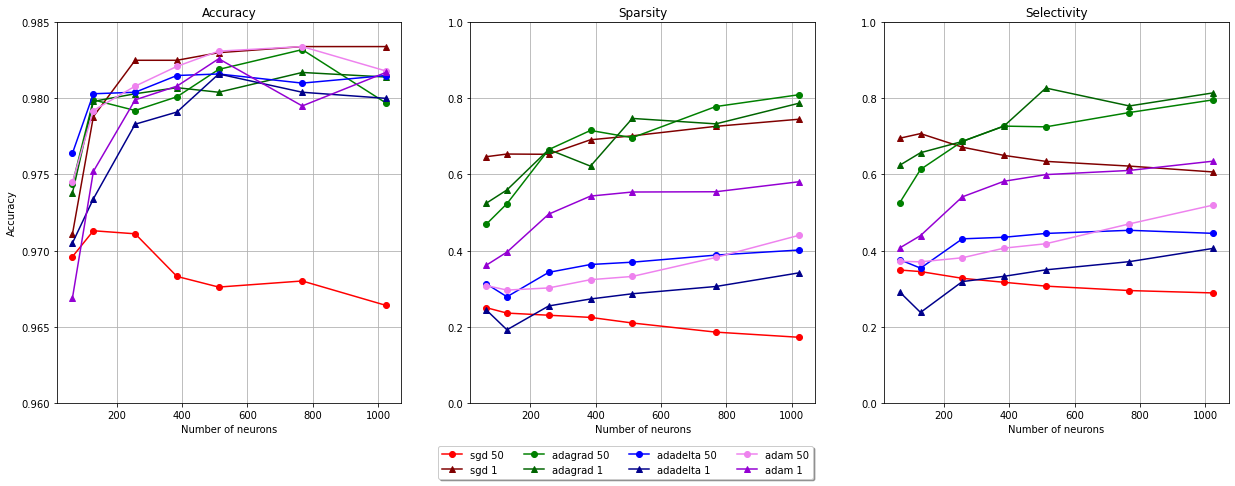

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,7))

# Test accuracy 
ax1.plot(hidden_layer_neurons, test_acc_sgd, marker='o', label='sgd accuracy 50', c='red')
ax1.plot(hidden_layer_neurons, test_acc_sgd1, marker='^', label='sgd accuracy 1', c='maroon')

ax1.plot(hidden_layer_neurons, test_acc_Adagrad, marker='o', label='adagrad accuracy 50', c='green')
ax1.plot(hidden_layer_neurons, test_acc_Adagrad1, marker='^', label='adagrad accuracy 1', c='darkgreen')

ax1.plot(hidden_layer_neurons, test_acc_Adadelta, marker='o', label='adadelta accuracy 50', c='blue')
ax1.plot(hidden_layer_neurons, test_acc_Adadelta1, marker='^', label='adadelta accuracy 1', c='darkblue')

ax1.plot(hidden_layer_neurons, test_acc_Adam, marker='o', label='adam accuracy 50', c='violet')
ax1.plot(hidden_layer_neurons, test_acc_Adam1, marker='^', label='adam accuracy 1', c='darkviolet')

# Sparsity 
ax2.plot(hidden_layer_neurons, spar_sgd, marker='o', label='sgd sparsity 50', c='red')
ax2.plot(hidden_layer_neurons, spar_sgd1, marker='^', label='sgd sparsity 1', c='maroon')

ax2.plot(hidden_layer_neurons, spar_Adagrad, marker='o', label='adagrad sparsity 50', c='green')
ax2.plot(hidden_layer_neurons, spar_Adagrad1, marker='^', label='adagrad sparsity 1', c='darkgreen')

ax2.plot(hidden_layer_neurons, spar_Adadelta, marker='o', label='adadelta sparsity 50', c='blue')
ax2.plot(hidden_layer_neurons, spar_Adadelta1, marker='^', label='adadelta sparsity 1', c='darkblue')

ax2.plot(hidden_layer_neurons, spar_Adam, marker='o', label='adam sparsity 50', c='violet')
ax2.plot(hidden_layer_neurons, spar_Adam1, marker='^', label='adam sparsity 1', c='darkviolet')

# Selectivity
ax3.plot(hidden_layer_neurons, selec_avg_sgd, marker='o', label='sgd 50', c='red')
ax3.plot(hidden_layer_neurons, selec_avg_sgd1, marker='^', label='sgd 1', c='maroon')

ax3.plot(hidden_layer_neurons, selec_avg_Adagrad, marker='o', label='adagrad 50', c='green')
ax3.plot(hidden_layer_neurons, selec_avg_Adagrad1, marker='^', label='adagrad 1', c='darkgreen')

ax3.plot(hidden_layer_neurons, selec_avg_Adadelta, marker='o', label='adadelta 50', c='blue')
ax3.plot(hidden_layer_neurons, selec_avg_Adadelta1, marker='^', label='adadelta 1', c='darkblue')

ax3.plot(hidden_layer_neurons, selec_avg_Adam, marker='o', label='adam 50', c='violet')
ax3.plot(hidden_layer_neurons, selec_avg_Adam1, marker='^', label='adam 1', c='darkviolet')

ax1.set_ylim([0.96,0.985])
ax2.set_ylim([0,1.0])
ax3.set_ylim([0,1.0])

ax1.set_title('Accuracy')
ax2.set_title('Sparsity')
ax3.set_title('Selectivity')

ax1.set_xlabel('Number of neurons')
ax2.set_xlabel('Number of neurons')
ax3.set_xlabel('Number of neurons')
ax1.set_ylabel('Accuracy')

ax1.grid()
ax2.grid()
ax3.grid()

ax3.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.1),
          fancybox=True, shadow=True, ncol=4)

plt.show()

# Accuracy x Sparsity (or Selectivity)

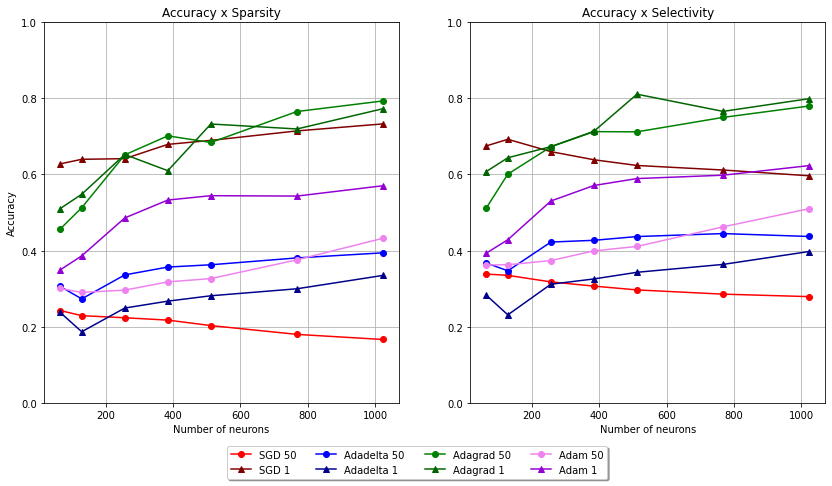

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# Accuracy x Sparsity 
ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_sgd, spar_sgd)], 
         label='SGD 50', marker='o', c='red')
ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_sgd1, spar_sgd1)], 
         label='SGD 1', marker='^', c='maroon')

ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adagrad, spar_Adagrad)], 
         label='Adagrad 50', marker='o',c='green')
ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adagrad1, spar_Adagrad1)], 
         label='Adagrad 1', marker='^',c='darkgreen')

ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adadelta, spar_Adadelta)], 
         label='Adadelta 50', marker='o',c='blue')
ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adadelta1, spar_Adadelta1)], 
         label='Adadelta 1', marker='^',c='darkblue')

ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adam, spar_Adam)], 
         label='Adam 50', marker='o',c='violet')
ax1.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adam1, spar_Adam1)], 
         label='Adam 1', marker='^',c='darkviolet')

ax1.set_ylim([0, 1.0])

ax1.set_title('Accuracy x Sparsity')
ax1.grid()

# Accuracy x Selectivity   
ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_sgd, selec_avg_sgd)], 
         label='SGD 50', marker='o',c='red')
ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_sgd1, selec_avg_sgd1)], 
         label='SGD 1', marker='^',c='maroon')

ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adadelta, selec_avg_Adadelta)], 
         label='Adadelta 50', marker='o',c='blue')
ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adadelta1, selec_avg_Adadelta1)], 
         label='Adadelta 1', marker='^',c='darkblue')

ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adagrad, selec_avg_Adagrad)], 
         label='Adagrad 50', marker='o',c='green')
ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adagrad1, selec_avg_Adagrad1)], 
         label='Adagrad 1', marker='^',c='darkgreen')

ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adam, selec_avg_Adam)], 
         label='Adam 50', marker='o',c='violet')
ax2.plot(hidden_layer_neurons, [a * b for a, b in zip(test_acc_Adam1, selec_avg_Adam1)], 
         label='Adam 1', marker='^',c='darkviolet')

ax2.set_ylim([0, 1])

ax2.set_title('Accuracy x Selectivity')
ax2.grid()

ax1.set_xlabel('Number of neurons')
ax2.set_xlabel('Number of neurons')
ax1.set_ylabel('Accuracy')

ax2.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.1),
          fancybox=True, shadow=True, ncol=4)

plt.show()

# Compare

In [22]:
def compare(optimizer_name):
    print(f'\n==============={optimizer_name}===============')
    test_vals, sparsities, selectivity_average, selectivity_std = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} first (64): Test acc={test_vals[0]:.3f}, Spar={sparsities[0]:.3f}, Selec avg={selectivity_average[0]:.3f}, Selec std={selectivity_std[0]:.3f}")
    print(f"{optimizer_name} last(1024): Test acc={test_vals[-1]:.3f}, Spar={sparsities[-1]:.3f}, Selec avg={selectivity_average[-1]:.3f}, Selec std={selectivity_std[-1]:.3f}")
    print()
    print("test deviation: 1024 - 64(original):", test_vals[-1] - test_vals[0])
    print("sparsity deviation: 1024 - 64(original):", sparsities[-1] - sparsities[0])
    print("selectivity deviation: 1024 - 64(original):", selectivity_average[-1] - selectivity_average[0])
    print()
    print("test % difference: 1024 / 64(original):", (test_vals[-1] / test_vals[0]) * 100)
    print("sparsity % difference: 1024 / 64(original):", (sparsities[-1] / sparsities[0]) * 100)
    print("selectivity % difference: 1024 / 64(original):", (selectivity_average[-1] / selectivity_average[0]) * 100)


In [23]:
compare('SGD')
compare('Adadelta')
compare('Adagrad')
compare('Adam')


===============SGD===============
SGD first (64): Test acc=0.970, Spar=0.250, Selec avg=0.349, Selec std=0.187
SGD last(1024): Test acc=0.966, Spar=0.172, Selec avg=0.289, Selec std=0.133

test deviation: 1024 - 64(original): -0.0031999999999999806
sparsity deviation: 1024 - 64(original): -0.07800000000000001
selectivity deviation: 1024 - 64(original): -0.06024968738804609

test % difference: 1024 / 64(original): 99.66996699669967
sparsity % difference: 1024 / 64(original): 68.8
selectivity % difference: 1024 / 64(original): 82.72914917589007

===============Adadelta===============
Adadelta first (64): Test acc=0.976, Spar=0.313, Selec avg=0.376, Selec std=0.175
Adadelta last(1024): Test acc=0.982, Spar=0.401, Selec avg=0.445, Selec std=0.146

test deviation: 1024 - 64(original): 0.005099999999999993
sparsity deviation: 1024 - 64(original): 0.08849999999999997
selectivity deviation: 1024 - 64(original): 0.0690881331198897

test % difference: 1024 / 64(original): 100.52232691519869
spa

# SGD

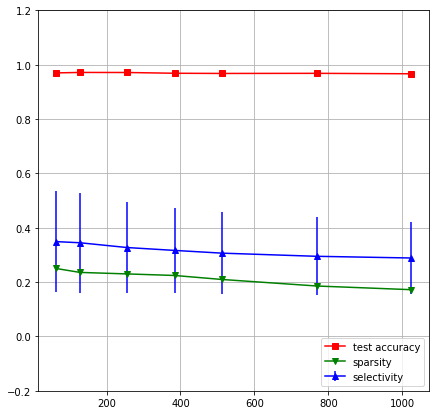

In [24]:
plotter('SGD')

# Adadelta

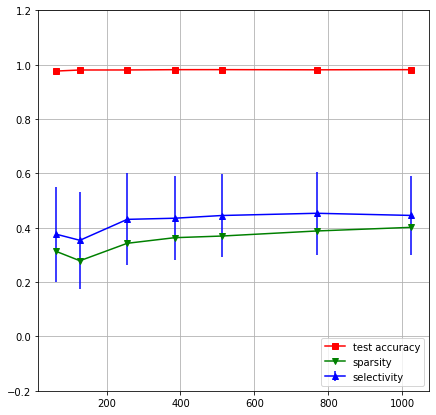

In [25]:
plotter('Adadelta')

# Adagrad

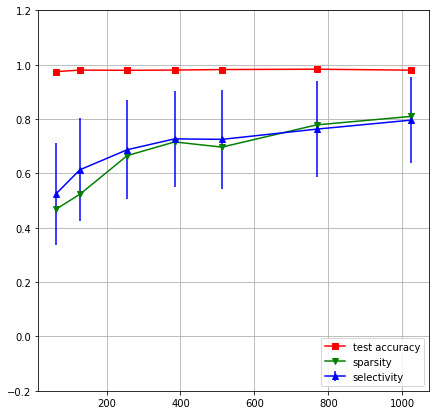

In [26]:
plotter('Adagrad')

# Adam

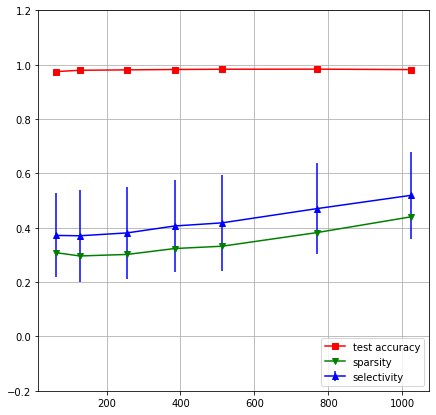

In [27]:
plotter('Adam')